In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]

data_type = "kmer"
trans = "clr_scale"
numPc = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]
folder_names = ['AGP_max_k6' for i in range(15)]
file_names = ['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(15)]
# file_names = ['rawfilter_TRUE','minerva_first' + str(numPc) + 'filter_TRUE',
#               'refactor_first' + str(numPc) + 'filter_TRUE',
#               'smartsva_first' + str(numPc) + 'filter_TRUE']
file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["6" + '-mer' for i in range(15)]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

metric_word = 'auc_all'#''auc_all' # 'pearson' # 

classifier_name = 'bin_antibiotic_last_year'# 'bmi_prediction' #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
classifier = "Random Forest"#'Regression'#"Random Forest"
select_columns_bool = True
title = 'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
special_name = "Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 

In [4]:
file_names

['minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale',
 'minerva_first20filter_TRUE_trans_clr_scale',
 'minerva_first30filter_TRUE_trans_clr_scale',
 'minerva_first40filter_TRUE_trans_clr_scale',
 'minerva_first50filter_TRUE_trans_clr_scale',
 'minerva_first100filter_TRUE_trans_clr_scale']

In [5]:
folder_names

['AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6',
 'AGP_max_k6']

In [6]:
df_metric = pd.DataFrame()

In [7]:
file_names

['minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale',
 'minerva_first20filter_TRUE_trans_clr_scale',
 'minerva_first30filter_TRUE_trans_clr_scale',
 'minerva_first40filter_TRUE_trans_clr_scale',
 'minerva_first50filter_TRUE_trans_clr_scale',
 'minerva_first100filter_TRUE_trans_clr_scale']

In [8]:

for f in range(len(file_names)):
    if metric_word == 'pearson':
        filename_temp = data_folder + folder_names[f] +"/cont_pred/"+ data_type + "_BatchCorrected_bmi_corrected_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        filename_temp = data_folder + folder_names[f] +"/class_pred/"+ data_type + "_BatchCorrected_"+ classifier_name + "_" + file_names[f] + "_classification_auc.pkl"
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()])   
        if metric_word == "auc_all":
            df_metric[nice_names[f] + "_first_" + str(numPc[f])] = pd.Series(data_temp[file_names[f]][classifier][metric_word])
        else:
            df_metric[nice_names[f] + "_first_" + str(numPc[f])] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

In [9]:
df_metric

,6-mer_first_1,6-mer_first_2,6-mer_first_3,6-mer_first_4,6-mer_first_5,6-mer_first_6,6-mer_first_7,6-mer_first_8,6-mer_first_9,6-mer_first_10,6-mer_first_20,6-mer_first_30,6-mer_first_40,6-mer_first_50,6-mer_first_100
0,0.639631,0.633561,0.636964,0.577154,0.630643,0.626280,0.613087,0.608635,0.619322,0.595658,0.559059,0.550987,0.547959,0.539648,0.549089
1,0.633912,0.644122,0.663832,0.579455,0.626494,0.613095,0.628385,0.627160,0.617139,0.610150,0.567864,0.552745,0.563915,0.551605,0.545142
2,0.627431,0.646101,0.631674,0.574559,0.638923,0.618320,0.617364,0.609900,0.593897,0.602936,0.563142,0.550124,0.550541,0.568366,0.530960
3,0.660089,0.641856,0.624496,0.583840,0.623977,0.611749,0.630572,0.641260,0.595804,0.615559,0.571845,0.543594,0.538735,0.537556,0.536118
4,0.619068,0.643671,0.625493,0.579750,0.606716,0.629417,0.609535,0.626812,0.606416,0.641863,0.550172,0.534953,0.563849,0.547004,0.525726
5,0.640912,0.612325,0.631979,0.576385,0.617302,0.602446,0.611872,0.614540,0.607754,0.609620,0.569751,0.553545,0.537690,0.552410,0.549574
6,0.636886,0.637762,0.628214,0.591045,0.633266,0.598924,0.623748,0.619053,0.609923,0.623026,0.558737,0.545980,0.555318,0.557050,0.537621
7,0.626093,0.630974,0.639172,0.584557,0.635657,0.603375,0.610321,0.605383,0.601638,0.612748,0.546263,0.545161,0.531245,0.556150,0.520901
8,0.662993,0.639823,0.641476,0.584130,0.649984,0.646133,0.633580,0.640476,0.623836,0.614099,0.571823,0.539236,0.550069,0.531621,0.533971
9,0.645218,0.643399,0.634954,0.575559,0.633879,0.619742,0.619987,0.621894,0.626449,0.619827,0.553726,0.536765,0.547987,0.536102,0.529478


In [10]:
df_metric.columns
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

Index(['6-mer_first_1', '6-mer_first_2', '6-mer_first_3', '6-mer_first_4',
       '6-mer_first_5', '6-mer_first_6', '6-mer_first_7', '6-mer_first_8',
       '6-mer_first_9', '6-mer_first_10', '6-mer_first_20', '6-mer_first_30',
       '6-mer_first_40', '6-mer_first_50', '6-mer_first_100'],
      dtype='object')

In [11]:
select_columns_bool = False

In [12]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
select_labels = ["raw","MINERVA","Refactor","SmartSVA"]

#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

In [13]:
select_labels

['raw', 'MINERVA', 'Refactor', 'SmartSVA']

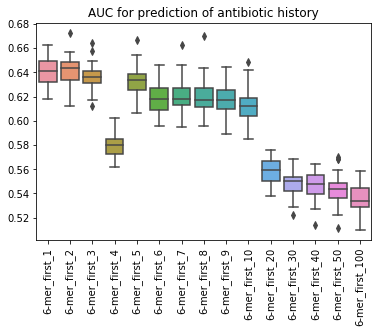

In [14]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
if metric_word == "pearson":
    g.set(ylim=(-0.1, 0.1))
g.set_title(title)
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans + '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans +  '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')




In [15]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'